# HW4
* name: **Ali Safarpoor Dehkordi**
* sid: **99210301**


# imports:

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import scipy.signal as sig
import numpy as np

In [2]:
!wget https://www.dropbox.com/s/9sakh5x8h1rrrip/HW4.zip

--2022-06-12 16:47:21--  https://www.dropbox.com/s/9sakh5x8h1rrrip/HW4.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9sakh5x8h1rrrip/HW4.zip [following]
--2022-06-12 16:47:21--  https://www.dropbox.com/s/raw/9sakh5x8h1rrrip/HW4.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb43c1b4e4e896d67ce544e2ebe.dl.dropboxusercontent.com/cd/0/inline/BnHzRRKcwsFMppJtYtgmxsUN5LipGZzbriDC6JKE1iFUDotyIceeZz5wYFDmY8u7FSMAbQwCWJCnJFseuYGGiHY2TuVL5PLeN_4MaibgTHKSyt4oIn3oO0RG52RRzwyscCtK9D3nFm5pTboGJ8T2UEtSH2LklNqGYUdggWuG0_m9Zg/file# [following]
--2022-06-12 16:47:21--  https://ucb43c1b4e4e896d67ce544e2ebe.dl.dropboxusercontent.com/cd/0/inline/BnHzRRKcwsFMppJtYtgmxsUN5LipGZzbriDC6JKE1iFUDotyIceeZz5wYFDmY8u7FSMAbQwCWJCnJFseuYG

In [3]:
import zipfile
with zipfile.ZipFile("HW4.zip","r") as zip_ref:
    zip_ref.extractall("HW4-data")

# Q2



In [14]:
%cd HW4-data

[Errno 2] No such file or directory: 'HW4-data'
/content/HW4-data


In [15]:
!pwd
!ls

/content/HW4-data
 baby.mp4  'blacked.png?raw=true'  'edge folder'   F22_edged.mp4   F22.mp4


In [16]:
vidcap = cv2.VideoCapture('F22.mp4')
success,image = vidcap.read()
count = 0
originals = []
while success:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    originals.append(gray)
    success,image = vidcap.read()

In [17]:
# first_run = False
# if first_run:
    # originals = imgs[:]
originals = np.array(originals[:])
imgs = originals[:]
imgs = np.array(imgs) 

In [18]:
def show_samples(imgs,special_ids = [5,500,-5]):
    for i in special_ids:
        # print(len(imgs),len(imgs[0]),len(imgs[0][0]))
        print(imgs[i].shape)
        cv2_imshow(imgs[i])

In [19]:
#denoising
def denoiser(imgs):
    kernel = np.ones((5,5))/25
    imgs_temp = []
    for img in tqdm(imgs):
        imgs_temp.append(cv2.filter2D(img,-1,kernel))
    imgs = imgs_temp[:]
    return imgs

In [20]:
def thresholder(imgs,th=70):
    imgs = np.copy(imgs)
    imgs_temp = []
    for img in tqdm(imgs):
        img[img<th] = th
        img -= th
        imgs_temp.append(img)
    imgs = imgs_temp[:]
    return imgs

In [21]:
def erod_dilate(imgs):
    out = []
    for a in imgs:
        kernel1 = np.ones((5,5))
        a = cv2.erode(a, kernel1)
        a = cv2.dilate(a, kernel1)
        out.append(a)
    return np.array(out)

In [22]:
# def remove_left_hand(imgs):
#     a = imgs[:]
#     a[:,:,0:40]=0
#     return a

In [23]:
imgs.shape

(1287, 240, 426)

100%|██████████| 1287/1287 [00:00<00:00, 21511.39it/s]


(240, 426)


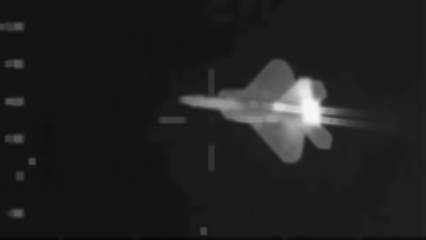

(240, 426)


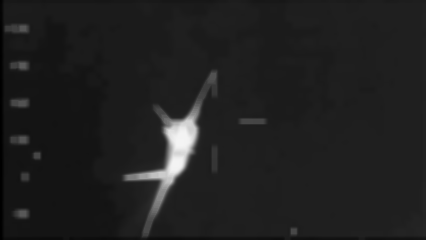

(240, 426)


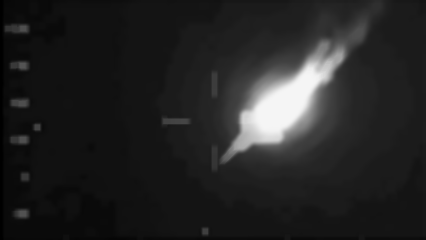

In [24]:
imgs = np.copy(originals)
# imgs = remove_left_hand(imgs[:])
# show_samples(imgs)
imgs = denoiser(imgs)
imgs = thresholder(imgs,th=10)
imgs = erod_dilate(imgs[:])

show_samples(imgs)

In [48]:
def edge(images):
    images = np.copy(images)
    out = []
    for a in images:
        a = cv2.GaussianBlur(a, (5, 5), 0)
        a = cv2.Canny(a, 50, 50)
        out.append(a)
    return np.array(out)

(240, 426)


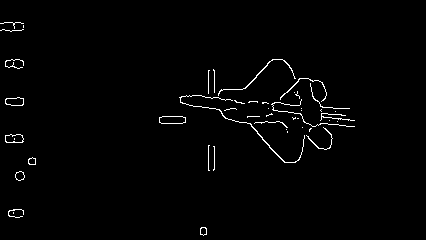

(240, 426)


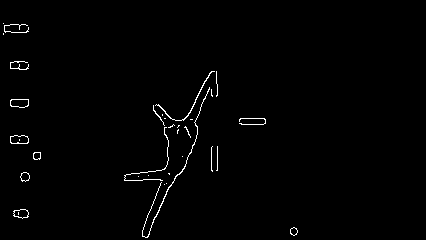

(240, 426)


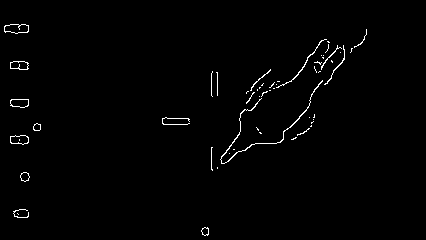

In [41]:
# imgs2 = imgs[:]
# imgs2 = edge(imgs2[:])
# show_samples(imgs2)

In [27]:
# !wget https://github.com/aSafarpoor/open_repo_storhouse_for_nlp_Quran/blob/main/blacked.png?raw=true

# shablon = 'blacked.png?raw=true'
# shablon = cv2.imread(shablon,cv2.IMREAD_GRAYSCALE)
# cv2_imshow(shablon)

# kernel1 = np.ones((6,6))
# shablon = cv2.dilate(shablon, kernel1)
# shablon = cv2.dilate(shablon, kernel1)
# shablon = cv2.erode(shablon, kernel1)
# kernel2 = np.ones((2,2))
# shablon = cv2.erode(shablon, kernel2)
# cv2_imshow(shablon)



In [28]:
# def shabloner(imgs,shablon):
#     zs = imgs[:]
#     out = []
#     for z in tqdm(zs):
#         z = z-shablon
#         z[z<0] = 0 
#         out.append(z)

#     return np.array(out)

In [29]:
# imgs3 = np.copy(imgs2)
# imgs3 = shabloner(imgs3,shablon)
# show_samples(imgs3,[1,1000,-1])

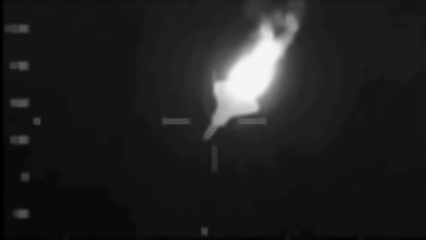

In [49]:
image = imgs[1200][:]
cv2_imshow(image)

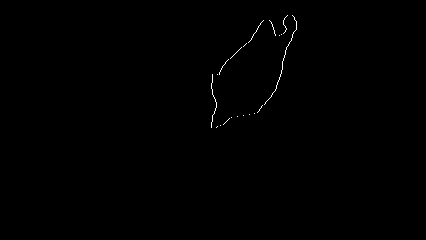

In [61]:
gray = image
thresh = 255-cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

cv2_imshow(edge(thresh))

In [51]:
imgs2 = []
for img in tqdm(imgs):
    thresh = 255-cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    kernel1 = np.ones((5,5))
    thresh = cv2.erode(thresh, kernel1)
    cv2_imshow(edge(thresh))
    imgs2.append(edge(thresh))


100%|██████████| 1287/1287 [00:39<00:00, 32.64it/s]


(240, 426, 1)


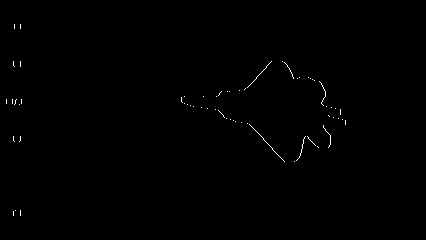

(240, 426, 1)


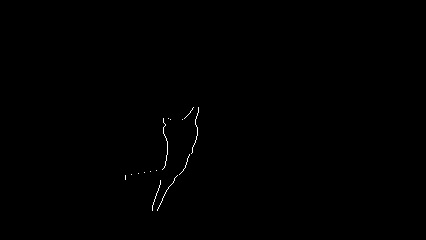

(240, 426, 1)


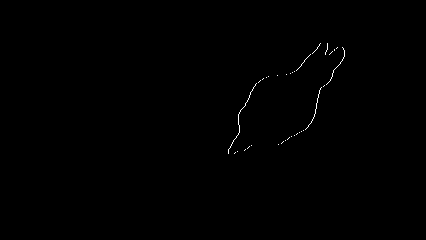

In [65]:
imgs2 = np.array(imgs2)
show_samples(imgs2)

In [70]:
if len(imgs2.shape) == 4:
    imgs2=imgs2.reshape((1287,240,426))


In [71]:
out = []
for i in tqdm(range(len(originals))):
    o = np.copy(originals[i].transpose())
    r = o[:]
    g = o[:]
    b = o[:]

    im = np.copy(imgs2[i].transpose() )
    r = np.array(r, dtype=np.float64)
    b = np.array(b, dtype=np.float64)
    g = np.array(g, dtype=np.float64)

    # b *= im
    # b *= im
    im[:45,:]=0
    g[im>100] = 255
    
    r[im>100] = 0
    b[im>100] = 0

    # r[im>0] = 0
    # b[im>0] = 0


    out.append(np.array([r,g,b]).transpose())

out = np.array(out)

100%|██████████| 1287/1287 [00:05<00:00, 243.05it/s]


(240, 426, 3)


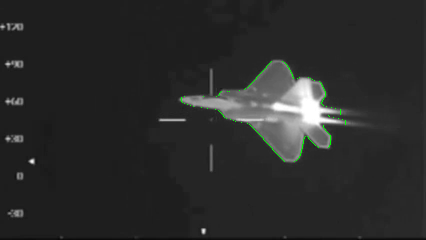

(240, 426, 3)


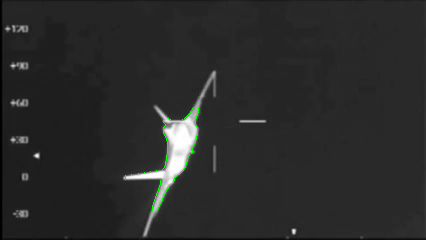

(240, 426, 3)


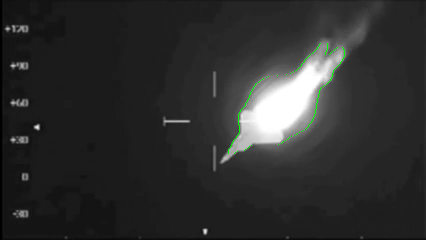

In [72]:
show_samples(out)

In [74]:
import os
import moviepy.video.io.ImageSequenceClip as mvii

fps=25

out2 = [i for i in out]
clip = mvii.ImageSequenceClip(out2, fps=fps)
clip.write_videofile('F22_edged-2.mp4')

[MoviePy] >>>> Building video F22_edged-2.mp4
[MoviePy] Writing video F22_edged-2.mp4


100%|██████████| 1287/1287 [00:08<00:00, 144.91it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: F22_edged-2.mp4 



In [75]:
clip = ''

In [76]:
from google.colab import files
files.download("F22_edged-2.mp4")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>